<a href="https://colab.research.google.com/github/ArthurMarqq/Projeto_Bootcamp01/blob/main/Projeto/Analise_taxa_mortalidade_SUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto 01 Bootcamp Alura


**Considerações iniciais**: 

Esse projeto usará dados referentes as taxas de mortalidade no SUS de Janeiro de 2008 até Setembro de 2021.

A idéia inicial é tentar, utilizando os aprendizados do primeiro módulo, traçar hipóteses a fim de entender melhor o comportamento dos dados.


**Outras considerações importantes para facilitar a leitura**:

A taxa de mortalidade é a razão entre a quantidade de óbitos e o número de AIH aprovadas, computadas como internações, no período, multiplicada por 100. (**informação retirada das notas técnicas da base de dados do datasus**) 

Os links estarão devidamente anexados no final desse projeto.

O recorte do projeto será nas cidades do sudeste brasileiro (Minas Gerais, São Paulo, Rio de janeiro e Espirito Santo) a fim de entender melhor o comportamento da curva da taxa de mortalidade nessa região brasileira, considerando que essa é a região mais desenvolvida do Brasil, a ideia é procurar se existem diferenças na taxa de mortalidade e se é possível traçar algumas ideias e considerações em relação a isso.

Algumas idéias iniciais que procuro descobrir:

*   Existem diferenças consideráveis na taxa de mortalidade de cidade para cidade na região?
*   É possível dizer, olhando para os dados, que quanto mais rica for a cidade, menor a taxa de mortalidade?

*  Cidades que possuem uma sazonalidade de turistas maior (Rio de janeiro com o carnaval por exemplo), tem sua taxa de mortalidade muito afetada?

In [47]:
# importando o pandas e o pyplot
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
# guardando os arquivos CSV dentro de variaveis diferentes

dados_taxa_mortalidade = pd.read_csv('/content/A123627189_28_143_208.csv', encoding = "ISO-8859-1", 
                                     sep=";", skiprows=3, skipfooter=12, thousands=".", decimal=",",
                                     engine='python')

Agora precisamos olhar se existe algum valor NaN no dataset

In [3]:
dados_taxa_mortalidade.isnull().sum().sum()

2

Existem dois valores vazios no dataset, ou seja, precisamos de alguma forma lidar com isso, uma vez que esses valores podem modificar os resultados das análises de uma forma negativa.


In [ ]:
dados_taxa_mortalidade.describe()

In [67]:
dados_taxa_mortalidade.head(25)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,3.0,3.6,2.8,3.0,3.2,3.1,3.9,4.2,4.1,4.1,3.9,3.8,3.8,3.3,3.6,3.5,3.6,3.8,3.9,3.7,3.8,3.7,3.9,3.8,3.6,3.4,3.6,3.7,3.8,4.1,4.1,4.2,4.3,3.8,4.1,4.1,4.1,3.9,3.9,...,4.4,4.8,4.6,4.3,4.9,4.7,5.2,4.6,4.9,4.5,4.6,4.4,5.2,4.9,4.8,5.1,4.9,4.6,4.6,4.5,4.9,5.0,4.7,5.0,4.9,4.7,4.4,4.2,4.6,4.3,4.9,4.5,4.7,4.8,4.6,4.7,5.0,4.7,5.6,4.4
1,12 Acre,3.5,4.5,4.4,4.4,4.7,4.1,4.4,4.5,4.7,4.3,4.1,4.2,4.6,4.2,4.2,4.4,4.5,4.4,4.6,4.2,NaN,4.4,4.0,5.0,4.6,4.2,4.1,4.1,4.4,4.2,4.5,4.6,4.3,4.2,4.2,5.0,4.9,4.3,4.4,...,5.1,5.0,4.8,4.6,5.4,5.0,4.8,4.9,5.2,5.1,5.3,4.6,4.4,4.8,4.8,4.6,4.8,5.2,5.4,5.1,5.0,4.9,4.7,4.6,5.1,4.6,4.5,4.7,4.4,4.7,4.6,5.5,5.4,5.4,5.1,4.3,5.1,4.8,NaN,4.8
2,13 Amazonas,4.6,4.7,4.6,4.6,4.9,4.9,4.8,4.9,4.9,4.7,4.4,4.7,4.9,4.5,4.5,4.8,4.9,4.8,4.9,4.6,4.8,4.8,5.0,5.0,5.0,4.5,4.4,4.6,4.7,4.9,4.8,4.9,4.9,4.7,4.8,5.0,4.8,4.9,4.7,...,5.2,5.2,5.3,5.3,5.3,5.1,5.1,5.2,5.2,5.3,5.3,5.2,5.2,5.2,5.2,4.9,5.1,5.1,5.3,5.2,5.1,5.4,5.3,5.5,5.3,5.4,5.5,5.1,5.6,5.1,5.4,5.5,5.6,5.3,5.4,5.3,5.4,5.0,5.3,5.1
3,14 Roraima,4.5,4.6,4.7,5.6,4.5,4.8,4.4,4.6,5.2,5.0,4.8,4.7,4.8,4.4,5.0,4.6,4.6,4.7,4.4,4.8,4.4,4.9,4.6,5.5,4.7,5.1,4.8,5.0,5.0,4.9,5.1,5.2,5.0,5.8,5.6,5.6,5.8,4.9,4.8,...,5.3,4.9,4.7,5.5,6.3,5.4,6.8,6.6,5.4,5.9,6.5,5.8,5.9,5.2,4.9,5.3,5.6,6.9,5.7,5.9,6.3,5.6,5.3,5.4,5.8,5.8,5.7,5.7,6.0,5.7,5.8,6.7,6.5,6.7,6.6,6.9,7.1,6.9,6.6,5.3
4,15 Pará,3.4,3.6,3.8,3.6,3.8,3.7,3.8,3.9,3.9,3.7,3.6,3.8,3.8,3.6,3.7,3.7,3.7,3.7,3.7,3.7,3.8,3.7,3.6,3.7,3.6,3.6,3.6,3.7,3.7,3.7,3.7,3.8,3.7,3.7,3.7,3.8,3.7,3.7,3.7,...,4.2,4.2,4.1,3.9,4.1,4.1,4.3,4.1,4.1,4.2,4.1,4.2,3.9,4.0,4.1,4.0,4.1,4.1,4.1,4.1,4.1,4.1,4.3,4.5,4.3,4.4,4.3,4.1,4.1,4.1,4.1,4.1,4.2,4.6,4.6,4.3,4.2,4.3,3.8,3.9
5,16 Amapá,5.3,5.0,4.3,4.8,4.9,4.6,4.5,5.6,4.6,4.6,4.7,5.3,5.2,3.9,4.1,5.5,4.7,5.0,4.9,4.4,4.9,5.2,4.1,4.5,4.8,4.4,4.6,4.8,4.5,5.3,4.9,4.8,4.2,4.2,5.0,4.5,4.6,4.9,5.2,...,5.4,5.6,5.4,5.1,4.8,4.9,5.6,4.7,5.3,4.9,5.7,5.2,5.5,6.0,5.2,5.2,5.0,5.3,5.1,4.9,5.1,4.5,4.7,4.7,5.5,5.3,4.8,5.2,4.5,5.4,5.2,4.9,5.5,5.6,5.6,5.2,5.7,4.9,5.2,5.1
6,17 Tocantins,4.1,4.8,5.0,4.5,4.5,4.5,4.8,4.7,4.4,4.2,4.4,4.8,4.7,4.3,4.4,4.7,4.6,4.5,4.7,4.6,4.6,4.5,4.6,4.6,4.5,4.5,4.5,4.3,4.4,4.5,4.5,4.5,4.4,4.4,4.4,4.6,4.4,4.4,4.6,...,5.1,5.7,5.5,5.7,5.2,5.3,5.7,6.0,6.4,5.5,5.7,5.6,5.3,5.3,5.4,5.6,5.6,5.4,5.4,5.3,5.9,5.2,5.4,5.3,5.0,4.8,5.0,5.0,5.3,5.2,5.6,5.8,5.8,5.4,5.3,5.3,5.0,5.2,3.8,4.7
7,21 Maranhão,4.7,4.8,4.8,4.6,4.6,4.6,4.6,4.7,4.7,4.7,5.3,4.8,4.8,4.8,4.7,4.6,4.7,4.7,4.6,4.6,4.7,4.5,4.6,4.6,4.4,4.5,4.4,4.5,4.5,4.4,4.4,4.5,4.4,4.4,4.5,4.4,4.4,4.5,4.3,...,4.5,4.4,4.4,4.3,4.4,4.7,4.6,4.5,4.5,4.4,4.5,4.6,4.7,4.8,4.6,4.6,4.7,4.6,4.6,4.7,4.8,4.9,4.9,5.0,5.0,4.9,5.0,4.9,4.8,4.9,4.8,4.9,5.0,5.1,5.1,5.2,5.4,5.3,5.5,4.6
8,22 Piauí,4.2,4.3,4.4,4.5,4.4,4.6,4.5,4.5,4.4,4.3,4.3,4.6,4.5,4.2,4.2,4.2,4.4,4.4,4.3,4.3,4.4,4.2,4.4,4.5,4.2,4.3,4.1,4.1,4.1,4.1,4.0,4.0,4.1,3.9,4.0,4.0,3.9,3.9,4.0,...,5.0,5.0,4.8,5.0,4.9,4.8,4.8,4.8,5.1,5.0,5.0,4.9,5.0,4.9,4.8,4.7,4.8,4.8,4.9,4.9,4.8,4.9,4.7,4.9,5.0,5.0,4.9,5.0,4.8,4.9,4.9,5.0,4.9,5.2,5.2,5.0,5.1,4.9,4.9,4.5
9,23 Ceará,4.3,4.7,5.1,5.2,5.2,5.2,5.1,4.9,5.1,4.9,5.1,5.2,5.1,5.3,5.0,5.2,5.1,5.2,5.1,5.1,5.0,5.0,5.2,5.0,5.0,5.0,4.9,4.9,4.9,5.0,5.0,5.2,5.1,5.2,5.2,5.3,5.2,5.1,5.2,...,5.6,5.7,5.5,5.6,5.5,5.5,5.5,5.6,5.5,5.5,5.6,5.6,5.6,5.7,5.7,5.6,5.6,5.7,5.6,5.9,5.6,5.8,5.8,5.7,5.5,5.8

In [6]:
colunas_taxa_mortalidade = dados_taxa_mortalidade.mean().index.tolist()
colunas_taxa_mortalidade.insert(0, "Unidade da Federação")

In [7]:
colunas_usaveis_taxa_mortalidade = dados_taxa_mortalidade[colunas_taxa_mortalidade]

In [8]:
colunas_usaveis_taxa_mortalidade = dados_taxa_mortalidade.set_index("Unidade da Federação")

In [9]:
# Deletando a coluna total para não distorcer a análise

colunas_usaveis = colunas_usaveis_taxa_mortalidade.drop('Total', axis=1)

Agora que temos o database basicamente limpo, nos resta cuidar dos dois valores que estão sem valor (NaN), no caso, usaremos a função backfill, uma vez que, temos uma quantidade de dados bastante extensa ao longo do tempo, e, por isso, acredito que seja a maneira mais acertiva de completar esses poucos dados faltantes.

In [22]:
dados_taxa_mortalidade_arrumado = colunas_usaveis.fillna(method='backfill')

In [23]:
# Checando se agora o dataset está completo

dados_taxa_mortalidade_arrumado.isnull().sum().sum()

0

In [ ]:
dados_taxa_mortalidade_arrumado.head(25)

Com isso, agora temos um dataset sem a coluna total e sem valores faltantes.

Agora precisamos fazer um recorte do dataset, para que possamos pegar apenas as cidades que nos interessam, no caso, São Paulo, Rio de Janeiro, Minas Gerais e Espírito Santo

In [28]:
dados_sudeste_taxa_mortalidade = dados_taxa_mortalidade.loc['31 Minas Gerais':'35 São Paulo']

(0.0, 12.0)

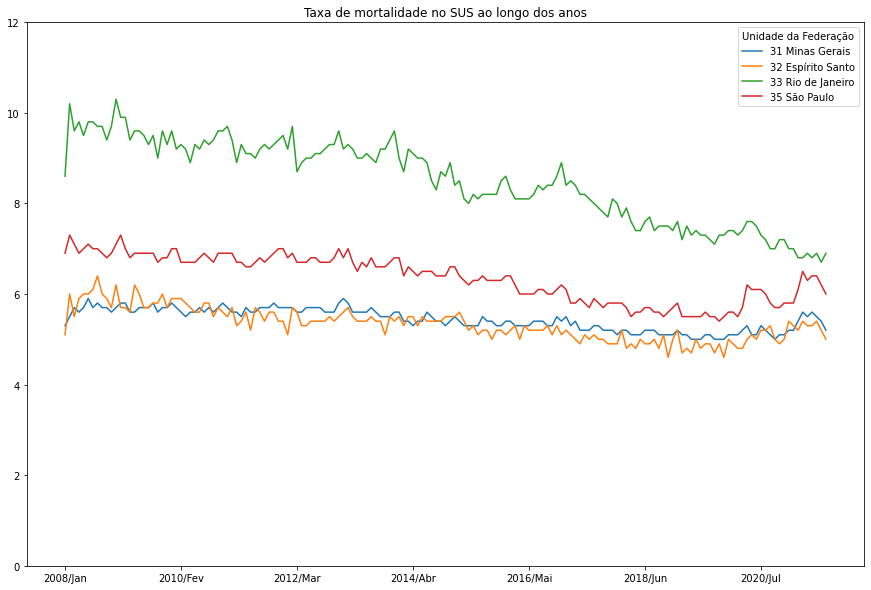

In [84]:
dados_sudeste_taxa_mortalidade.T.plot(figsize=(15,10))
plt.title('Taxa de mortalidade no SUS ao longo dos anos')
plt.ylim(0, 12)


Ao olhar para o gráfico de primeiro momento, é perceptivel que, os estados tiveram quedas na taxa de mortalidade do período de 2008 até 2020, após isso, a taxa de mortalidade sobe devido á pandemia do COVID-19.

De qualquer forma, é interessante perceber que a taxa de mortalidade foi caindo, provavelmente devido ou a melhoras tecnológicas na área de saúde, diferentes investimentos na área, surgimento de novos procedimentos, alguma melhora na gestão e também sem esquecer do aumento da campanha de vacinação.
